# 차원 축소
![PCA-LDA](https://d.pr/i/hI0WaD+)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### PCA (Principal Component Analysis)
- 데이터를 가장 잘 설명할 수 있는, 분산을 최대화하는 방향으로 축을 결정

In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target
iris_df.head()

In [ ]:
# 특성 2개만 뽑아서 시각화
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_df[iris_df['target'] == i]['sepal length (cm)']
    y = iris_df[iris_df['target'] == i]['sepal width (cm)']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [8]:
# PCA 주성분 분석
from sklearn.decomposition import PCA

pca = PCA(n_components=2)    # 2차원으로 축소

X = iris_df.iloc[:, :-1]    # 독립변수(특성 데이터)만 모아서 X

pca.fit(X)
iris_pca = pca.transform(X)    # 변환

iris_pca_df = pd.DataFrame(iris_pca, columns=['pca_col1', 'pca_col2'])
iris_pca_df['target'] = iris_data.target

In [ ]:
# 축소한 차원으로 시각화
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_pca_df[iris_pca_df['target'] == i]['pca_col1']
    y = iris_pca_df[iris_pca_df['target'] == i]['pca_col2']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('pca_col1')
plt.ylabel('pca_col2')
plt.show()

In [ ]:
# PCA를 통해 생성된 주성분들이 실제 데이터의 총 분산에 얼마만큼의 비율을 나타내는지
pca.explained_variance_ratio_

In [ ]:
# 원본 데이터 학습 및 평가
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr_clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(lr_clf, iris_data.data, iris_data.target, cv=5)
print("원본 데이터 평가:", np.mean(scores))

In [ ]:
# PCA 데이터 학습 및 평가
lr_clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(lr_clf, iris_pca_df[['pca_col1', 'pca_col2']], 
                         iris_pca_df['target'], cv=5)
print("PCA 데이터 평가:", np.mean(scores))

##### PCA 과일 데이터
- 흑백 이미지 데이터 픽셀값 0(흑)~255(백)

In [ ]:
fruits = np.load('./data/fruits_300.npy')
fruits.shape    # (300, 100, 100) = 300개의 이미지 * 100행 * 100열

In [19]:
# 이미지 시각화 함수
def draw_fruits(arr, ratio=1):
    N = len(arr)
    rows = int(np.ceil(N / 10))
    cols = N if rows < 2 else 10
    fig, ax = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < N:
                ax[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            ax[i, j].axis('off')
    
    plt.show()

In [ ]:
draw_fruits(fruits[:100])
draw_fruits(fruits[100:200])
draw_fruits(fruits[200:])

In [ ]:
# 1차원으로 펼치기
fruits_1d = fruits.reshape(300, 100 * 100)
fruits_1d.shape

In [ ]:
# PCA 주성분 50개로 차원 축소
pca = PCA(n_components=50)
pca.fit(fruits_1d)

In [ ]:
pca.components_.shape    # (50, 10000) = (PCA로 구현한 주성분 개수, 원본 데이터 특성 개수)

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
fruits_pca = pca.transform(fruits_1d)
fruits_pca.shape

In [28]:
# PCA 데이터 저장
np.save('./data/fruits_pca.npy', fruits_pca)

In [29]:
# 저장한 PCA 데이터 로드
fruits_pca = np.load('./data/fruits_pca.npy')

In [ ]:
# 주성분 비율
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [32]:
# 라벨 데이터 생성
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
# 원본 데이터 교차검증 점수 확인

# cross_val_score : 각 cv의 점수 반환
# cross_validate : 각 cv의 학습시간, 테스트시간, cv의 점수 반환 (평가지표 여러 개 사용 가능)
from sklearn.model_selection import cross_validate

lr_clf = LogisticRegression(max_iter=1000)
result = cross_validate(lr_clf, fruits_1d, target, cv=3)
result

In [ ]:
# PCA 데이터 교차검증 점수 확인
result_pca = cross_validate(lr_clf, fruits_pca, target, cv=3)
result_pca

In [ ]:
# 원본 데이터 복구
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

In [ ]:
# 복구 이미지 시각화
draw_fruits(fruits_inverse.reshape(-1, 100, 100))

### LDA (Linear Discriminant Analysis)
- 타겟 클래스 간 분리를 최대로 하는 축으로 결정

In [ ]:
from sklearn.preprocessing import StandardScaler

iris_data = load_iris()

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_data.data)
iris_scaled

In [38]:
# LDA 변환
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
iris_lda = lda.fit_transform(iris_scaled, iris_data.target)

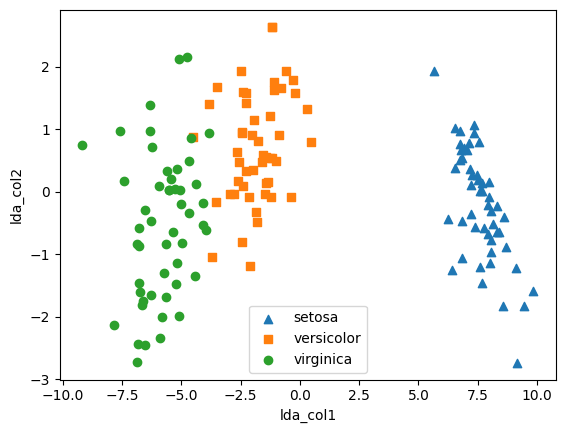

In [39]:
# LDA로 축소한 데이터 시각화 
iris_lda_df = pd.DataFrame(iris_lda, columns=['lda_col1', 'lda_col2'])
iris_lda_df['target'] = iris_data.target

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_lda_df[iris_lda_df['target'] == i]['lda_col1']
    y = iris_lda_df[iris_lda_df['target'] == i]['lda_col2']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('lda_col1')
plt.ylabel('lda_col2')
plt.show()

### LLE (Locally Linear Embedding)
- 데이터 포인트를 근접한 이웃과 선형 결합으로 표현하고 이를 유지하도록 저차원 공간에 매핑

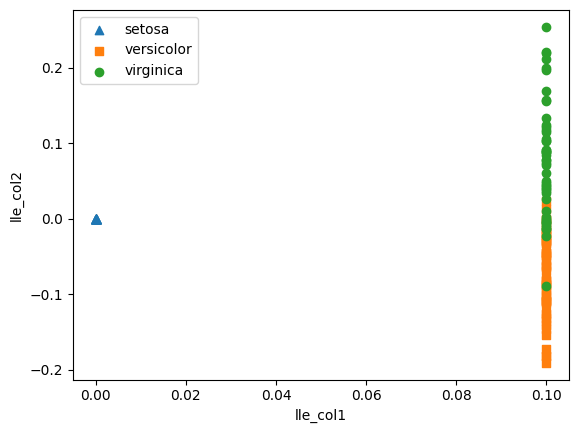

In [40]:
from sklearn.manifold import LocallyLinearEmbedding

iris_data = load_iris()

# LLE 변환
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
iris_lle = lle.fit_transform(iris_data.data)

# 시각화
iris_lle_df = pd.DataFrame(iris_lle, columns=['lle_col1', 'lle_col2'])
iris_lle_df['target'] = iris_data.target

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_lle_df[iris_lle_df['target'] == i]['lle_col1']
    y = iris_lle_df[iris_lle_df['target'] == i]['lle_col2']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('lle_col1')
plt.ylabel('lle_col2')
plt.show()

In [145]:
# LLE 변환 데이터 교차 검증 확인
result = cross_validate(lr_clf, iris_lle_df[['lle_col1', 'lle_col2']], iris_lle_df['target'], cv=3)
result

{'fit_time': array([0.00558138, 0.00305676, 0.00267005]),
 'score_time': array([0.0016551 , 0.        , 0.00101018]),
 'test_score': array([0.94, 0.9 , 0.9 ])}

In [146]:
# LLE 속성
print(lle.n_neighbors)    # 이웃 수
print(lle.n_components)    # 축소된 차원수
print(lle.reconstruction_error_)    # 재구성 오차

10
2
5.1168977786832e-07
